In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collect finance data


In [2]:
now = datetime.now()

ticker = 'TSLA'
start = datetime(now.year-10, now.month, now.day)
end = now

df = yf.download(ticker, start, end)
df

/tmp/ipykernel_490/1843497098.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-07-23,17.813334,17.993334,17.684668,17.976667,33408000
2015-07-24,17.694000,18.072666,17.594667,17.825333,42547500
2015-07-27,16.867332,17.628668,16.719334,17.495333,70413000
2015-07-28,17.654667,17.693333,16.789333,17.049999,58437000
2015-07-29,17.587999,17.859333,17.466667,17.618000,41851500
...,...,...,...,...,...
2025-07-16,321.670013,323.500000,312.619995,312.799988,97284800
2025-07-17,319.410004,324.339996,317.059998,323.149994,73922900


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-07-23,17.813334,17.993334,17.684668,17.976667,33408000
2015-07-24,17.694000,18.072666,17.594667,17.825333,42547500
2015-07-27,16.867332,17.628668,16.719334,17.495333,70413000
2015-07-28,17.654667,17.693333,16.789333,17.049999,58437000
2015-07-29,17.587999,17.859333,17.466667,17.618000,41851500


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-07-16,321.670013,323.500000,312.619995,312.799988,97284800
2025-07-17,319.410004,324.339996,317.059998,323.149994,73922900
2025-07-18,329.649994,330.899994,321.420013,321.660004,94255000
2025-07-21,328.489990,338.000000,326.880005,334.399994,75768800
2025-07-22,332.109985,335.410004,321.549988,329.739990,76974300


## 2. Explore Data

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2514, 5)

In [7]:
df.isna().sum()

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,132.195145,135.203810,129.060239,132.234568,1.145071e+08
std,120.748780,123.621564,117.829474,120.871660,7.346182e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,19.174333,19.483500,18.757666,19.058000,6.927538e+07
50%,99.000668,101.009666,95.066002,98.238667,9.559155e+07
75%,236.648331,240.865005,232.122505,235.787502,1.324153e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [9]:
df = df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-07-23,17.813334,17.993334,17.684668,17.976667,33408000
1,2015-07-24,17.694000,18.072666,17.594667,17.825333,42547500
2,2015-07-27,16.867332,17.628668,16.719334,17.495333,70413000
3,2015-07-28,17.654667,17.693333,16.789333,17.049999,58437000
4,2015-07-29,17.587999,17.859333,17.466667,17.618000,41851500


Text(0, 0.5, 'Close Price')

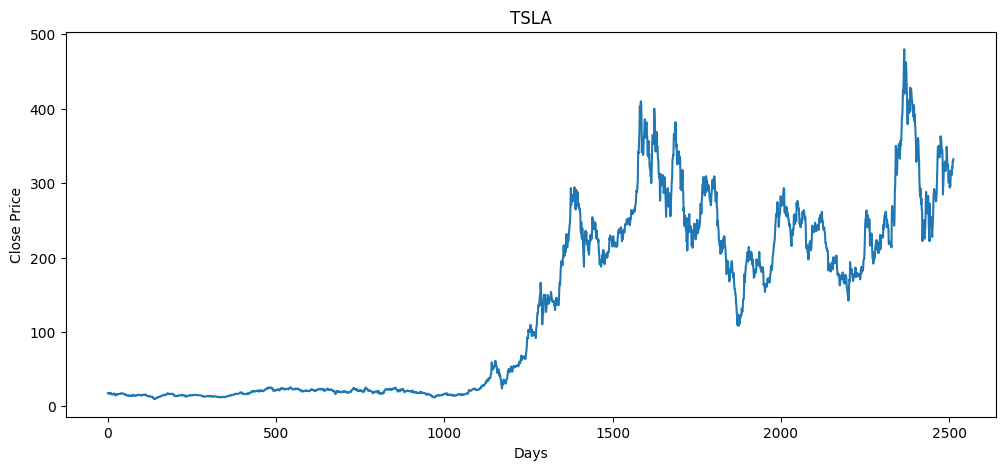

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

## 3. Feature Engineering

In [12]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[:5]) / 5)

30.0


In [13]:
df1 = pd.DataFrame(temp_df)

In [14]:
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [15]:
df1['MA_5'] = df1.rolling(5).mean()

In [16]:
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [17]:
# 100 moving average
df['MA_100'] = df.Close.rolling(100).mean()

In [18]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,
2509,2025-07-16,321.670013,323.500000,312.619995,312.799988,97284800,292.800000
2510,2025-07-17,319.410004,324.339996,317.059998,323.149994,73922900,292.616101
2511,2025-07-18,329.649994,330.899994,321.420013,321.660004,94255000,292.607301
2512,2025-07-21,328.489990,338.000000,326.880005,334.399994,75768800,292.864201
2513,2025-07-22,332.109985,335.410004,321.549988,329.739990,76974300,293.277301


Text(0, 0.5, 'Close Price')

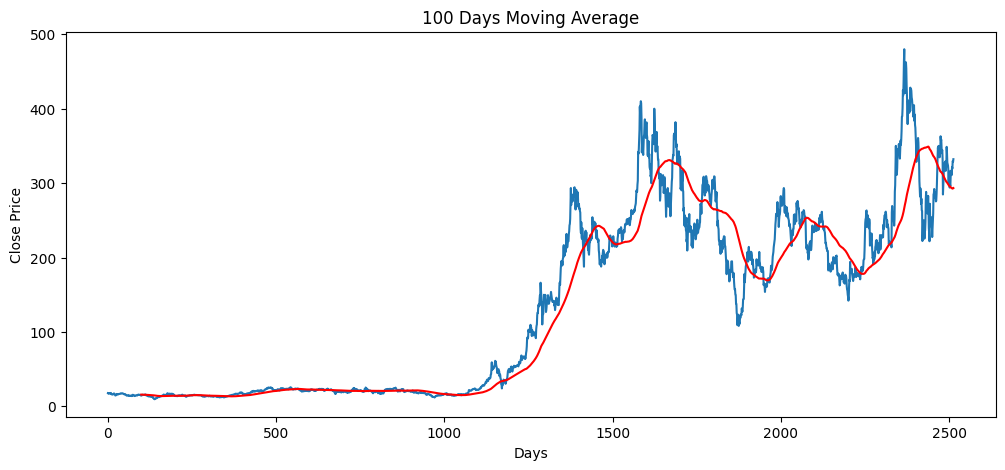

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')


In [20]:
# 200 Moving Average
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,
0,2015-07-23,17.813334,17.993334,17.684668,17.976667,33408000,NaN,NaN
1,2015-07-24,17.694000,18.072666,17.594667,17.825333,42547500,NaN,NaN
2,2015-07-27,16.867332,17.628668,16.719334,17.495333,70413000,NaN,NaN
3,2015-07-28,17.654667,17.693333,16.789333,17.049999,58437000,NaN,NaN
4,2015-07-29,17.587999,17.859333,17.466667,17.618000,41851500,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-05-05,14.102000,15.242667,13.986000,15.230667,168822000,14.290493,NaN
199,2016-05-06,14.328667,14.424667,13.874000,14.058000,85278000,14.289100,15.029143
200,2016-05-09,13.928000,14.410000,13.786667,14.381333,71646000,14.282660,15.009717


Text(0, 0.5, 'Close Price')

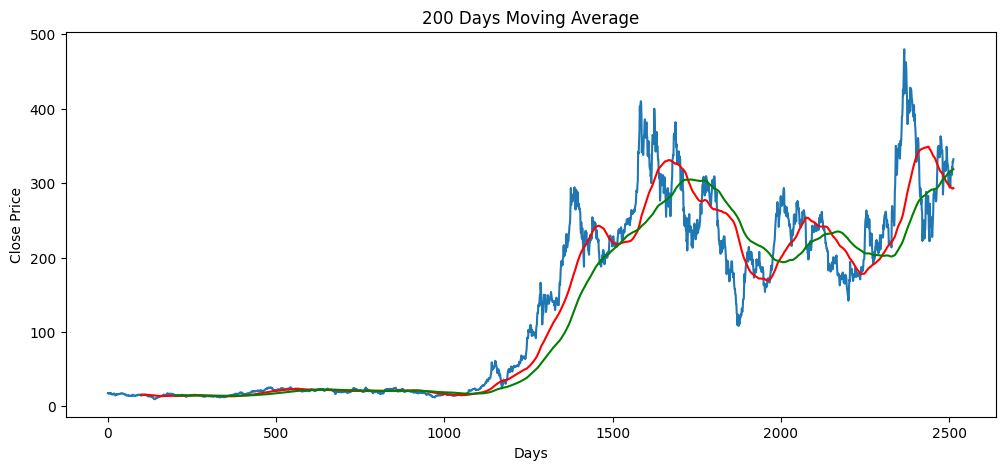

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')


In [22]:
df['Percentage Changed']= df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,TSLA,
0,17.813334,NaN
1,17.694000,-0.006699
2,16.867332,-0.046720
3,17.654667,0.046678
4,17.587999,-0.003776
...,...,...
2509,321.670013,0.035041
2510,319.410004,-0.007026
2511,329.649994,0.032059


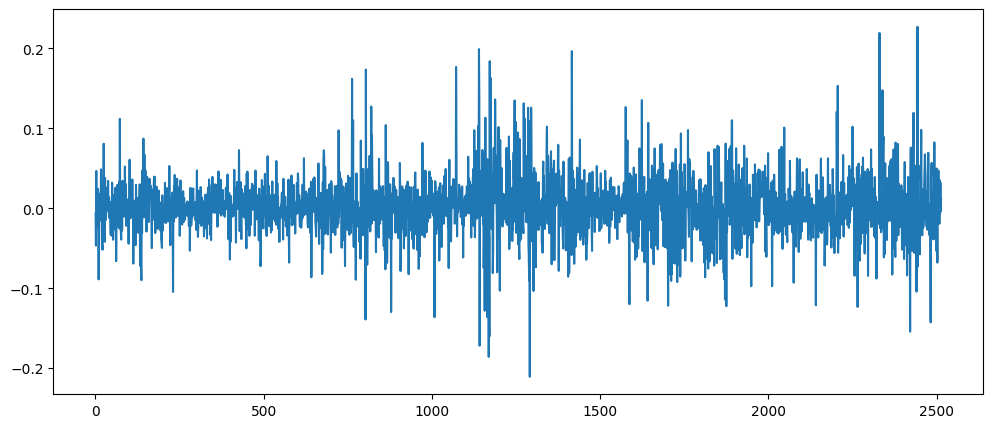

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

## 4. Data Preprocessing

In [24]:
df.shape

(2514, 9)

In [25]:
# Splitting data intor training and testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)]) 
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):]) 

print(data_testing)

Ticker        TSLA
1759    245.529999
1760    247.500000
1761    271.706665
1762    272.243347
1763    268.433319
...            ...
2509    321.670013
2510    319.410004
2511    329.649994
2512    328.489990
2513    332.109985

[755 rows x 1 columns]


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [27]:
data_training_array = scaler.fit_transform(data_training)

## 5. Sequence Creation

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.ndim

3

In [34]:
y_train.ndim

1

In [35]:
x_train.shape

(1659, 100, 1)

In [36]:
y_train.shape

(1659,)

## 6.Model Building

In [38]:
import tensorflow as tf


In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [42]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))


E0000 00:00:1753271875.898830     490 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1753271875.963281     490 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0176
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.6701e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.4498e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 8.7569e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.0289e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 8.1404e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 6.8212e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.0601e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 7.0476e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.7410e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 5.9663e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.7184e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.1548e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.8985e-04
Epoch 15/50
52/52 

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
# Save the trained model
model.save('stock_predictor.keras')

# 8. Prepare Test Data

In [47]:
data_testing

Ticker,TSLA
1759,245.529999
1760,247.500000
1761,271.706665
1762,272.243347
1763,268.433319
...,...
2509,321.670013
2510,319.410004
2511,329.649994
2512,328.489990


In [48]:
past_100_days = data_training.tail(100)

In [49]:
past_100_days

Ticker,TSLA
1659,254.679993
1660,266.923340
1661,269.956665
1662,290.143341
1663,288.123322
...,...
1754,233.070007
1755,237.039993
1756,238.313339
1757,240.066666


In [51]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,TSLA
0,254.679993
1,266.923340
2,269.956665
3,290.143341
4,288.123322
...,...
850,321.670013
851,319.410004
852,329.649994
853,328.489990


In [52]:
input_data= scaler.fit_transform(final_df)

In [53]:
input_data

array([[0.39428663],
       [0.42722011],
       [0.43537947],
       [0.48967976],
       [0.4842461 ],
       [0.4981619 ],
       [0.46175851],
       [0.46086185],
       [0.43063626],
       [0.44840756],
       [0.4794043 ],
       [0.46087079],
       [0.42236033],
       [0.39637581],
       [0.42822431],
       [0.46260132],
       [0.49072879],
       [0.52102612],
       [0.53516611],
       [0.60045909],
       [0.60505889],
       [0.61833801],
       [0.61539707],
       [0.68820386],
       [0.69513492],
       [0.69013165],
       [0.67543583],
       [0.68170327],
       [0.73627257],
       [0.68768382],
       [0.64688692],
       [0.65719826],
       [0.62871206],
       [0.58427482],
       [0.59415576],
       [0.62591462],
       [0.59240734],
       [0.60970343],
       [0.63109717],
       [0.58541356],
       [0.61372934],
       [0.61038485],
       [0.60408153],
       [0.49505063],
       [0.49961448],
       [0.49602791],
       [0.48997561],
       [0.518

In [54]:
input_data.shape

(855, 1)

In [55]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [56]:
x_test = np.array(x_test)
y_test = np.array(y_test)

## 9. Making Predictions 

In [58]:
x_test[0].shape

(100, 1)

In [59]:
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 


In [61]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

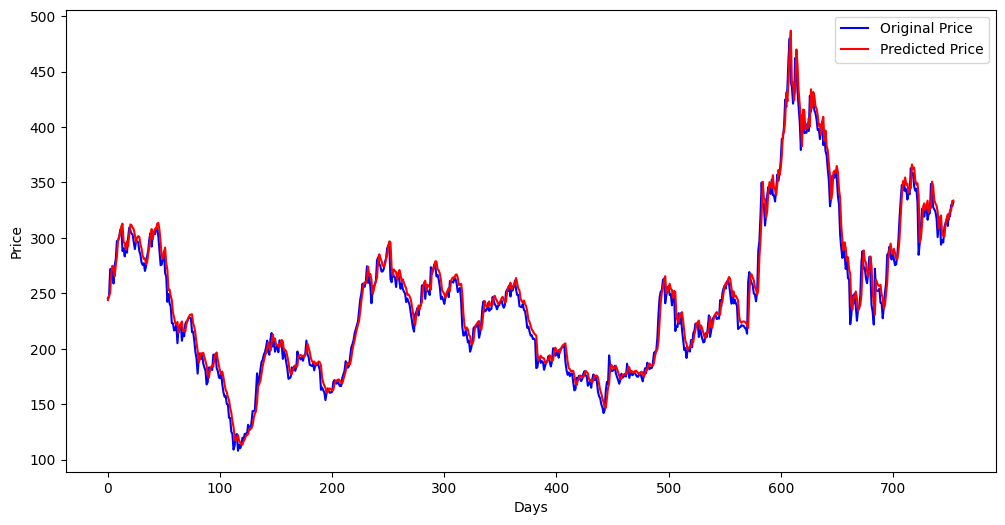

In [65]:
plt.figure(figsize=(12,6 ))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

(140.0, 220.0)

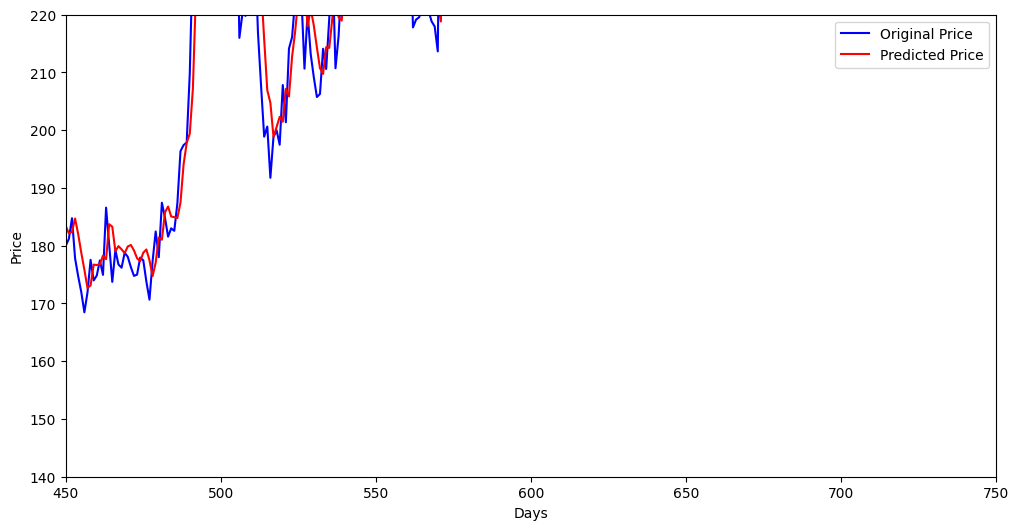

In [67]:
plt.figure(figsize=(12,6 ))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

## 10. Model Evaluation

In [72]:
# MSE ---> Mean Squared Error

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predicted)
print("MSE: ", mse)

MSE:  117.08994368228905


In [73]:
# RMSE ---> Root MSE

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  10.820810675836125


In [74]:
r2 = r2_score(y_test, y_predicted)
print("R2 :", r2)

R2 : 0.97407704335897
